In [2]:
columns =['VitD_levels','Doc_visits','TotalCharge']
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(url)[columns]
df.head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   VitD_levels  1000 non-null   float64
 1   Doc_visits   1000 non-null   int64  
 2   TotalCharge  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


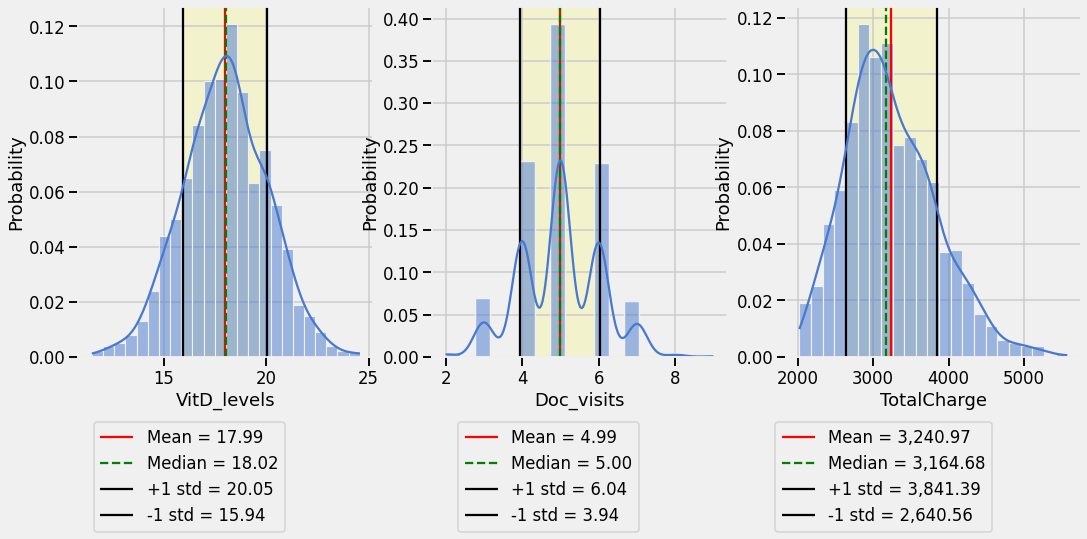

In [6]:
fig, ax = plt.subplots(1,3, figsize = (16, 6))
#sns.despine(left=True)
for i, col in enumerate(df.columns):
    #z_score = stats.zscore(df[col])
    mean = df[col].mean()
    median = df[col].median()
    plus_one_std = mean + df[col].std()
    minus_one_std = mean - df[col].std()
    ax[i].axvline(mean, color='red',label=f'Mean = {mean:,.2f}')
    ax[i].axvline(median,ls='--' ,color='green',label=f'Median = {median:,.2f}')
    ax[i].axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax[i].axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    sns.histplot(x=df[col],stat='probability',kde=True,ax=ax[i])
    ax[i].legend(loc='lower right',bbox_to_anchor=(.7,-.5),borderaxespad=0)
    ax[i].axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0,alpha=.15)

* ***VitD_levels***
    * Continuous
    * Slight Negative Skew, mean < median
    * Mesokurtic (values cluster in the middle of the distribution - normal)
* ***Doc_visits***
    * Discrete
    * Normal Distribution
    * Leptokurtic ("pointy", values cluster in the peak of the distribution - positive)
* ***Total Charge***
    * Continous
    * Positive Skew mean > median
    * Mesokurtic (values cluster in the middle of the distribution - normal)